<a href="https://colab.research.google.com/github/patcon/valency-anndata/blob/main/docs/notebooks/README.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet \
  git+https://github.com/patcon/polis-client \
  git+https://github.com/polis-community/red-dwarf@algo-registries \
  git+https://github.com/patcon/valency-anndata@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.0 MB/s eta 0:00

## Usage

### Loading Polis Data

Data was gathered using the Polis software (see: https://compdemocracy.org/polis
and https://github.com/compdemocracy/polis) and is sub-licensed under CC BY 4.0
with Attribution to The Computational Democracy Project.
The data and more information about how the data was collected can be found at
the following link: https://pol.is/report/r29kkytnipymd3exbynkd


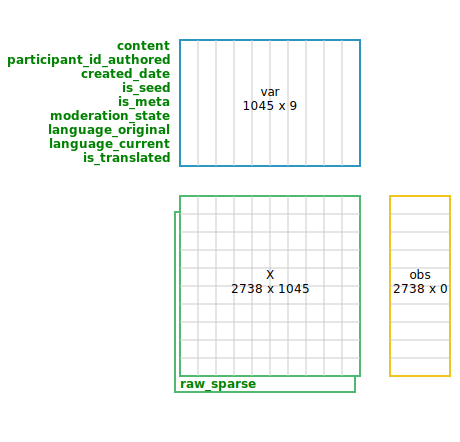

In [ ]:
import valency_anndata as val

adata = val.datasets.polis.load("https://pol.is/report/r29kkytnipymd3exbynkd")
val.viz.schematic_diagram(adata, diff_from=None)

### Running Polis Pipelines

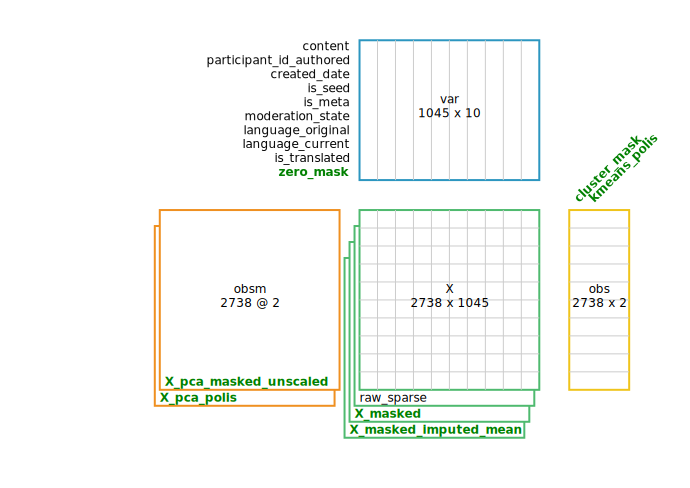

In [ ]:
with val.viz.schematic_diagram(diff_from=adata):
    val.tools.recipe_polis(adata, key_added_pca="X_pca_polis")

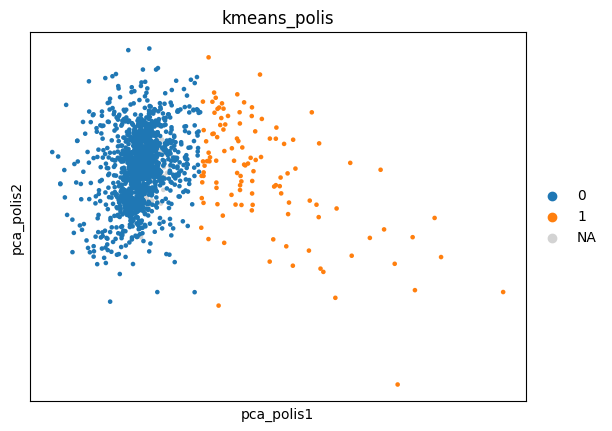

,count
kmeans_polis,
0,1627
1,116


In [ ]:
val.viz.embedding(adata, basis="pca_polis", color="kmeans_polis")

adata.obs["kmeans_polis"].value_counts()

### Exploring Polis Pipelines

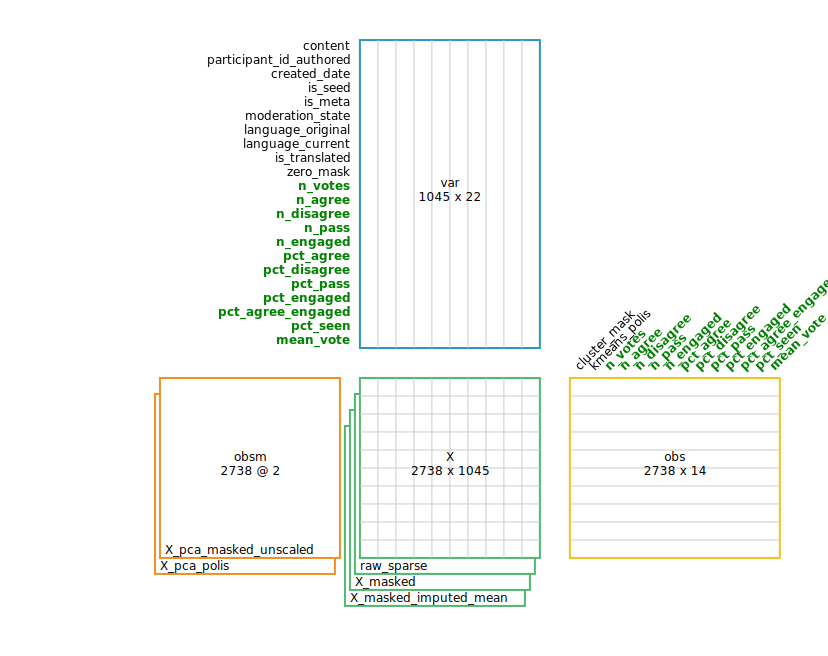

In [ ]:
with val.viz.schematic_diagram(diff_from=adata):
    val.preprocessing.calculate_qc_metrics(adata, inplace=True)

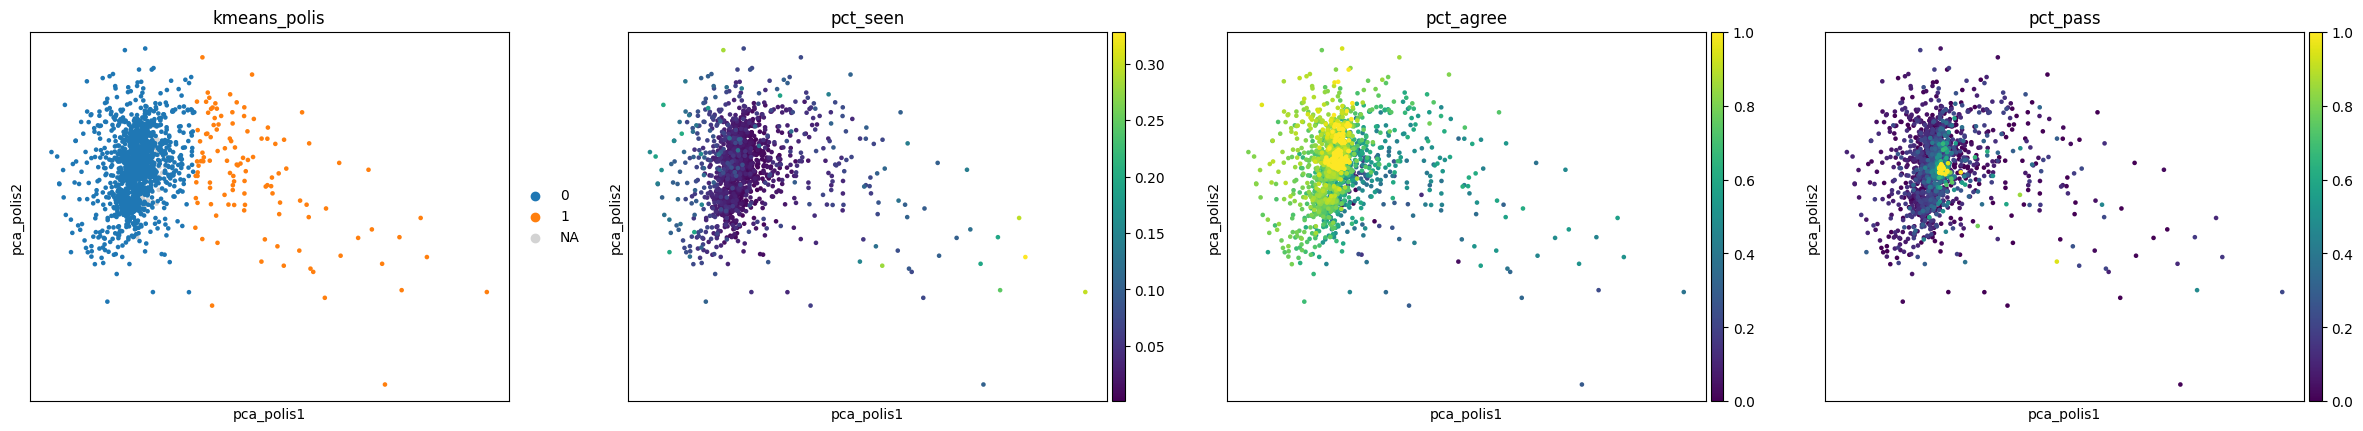

In [ ]:
val.viz.embedding(adata, basis="pca_polis",
    color=["kmeans_polis", "pct_seen", "pct_agree", "pct_pass"],
)

### Running & Exploring Alternative Pipelines

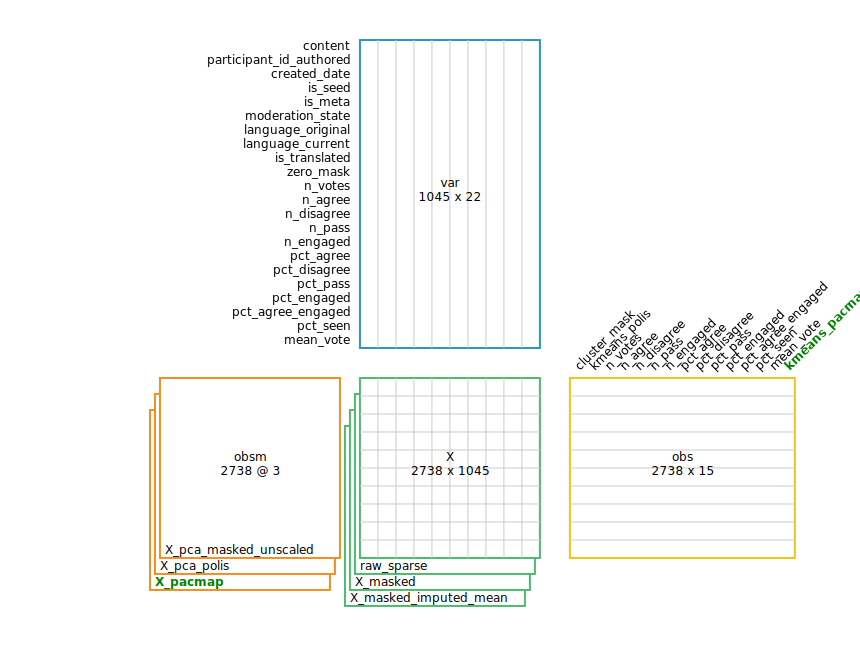

In [ ]:
with val.viz.schematic_diagram(diff_from=adata):
    val.tools.pacmap(adata, layer="X_masked_imputed_mean")
    val.tools.kmeans(
        adata,
        k_bounds=(2, 9),
        init="polis",
        use_rep="X_pacmap",
        mask_obs="cluster_mask",
        key_added="kmeans_pacmap",
    )

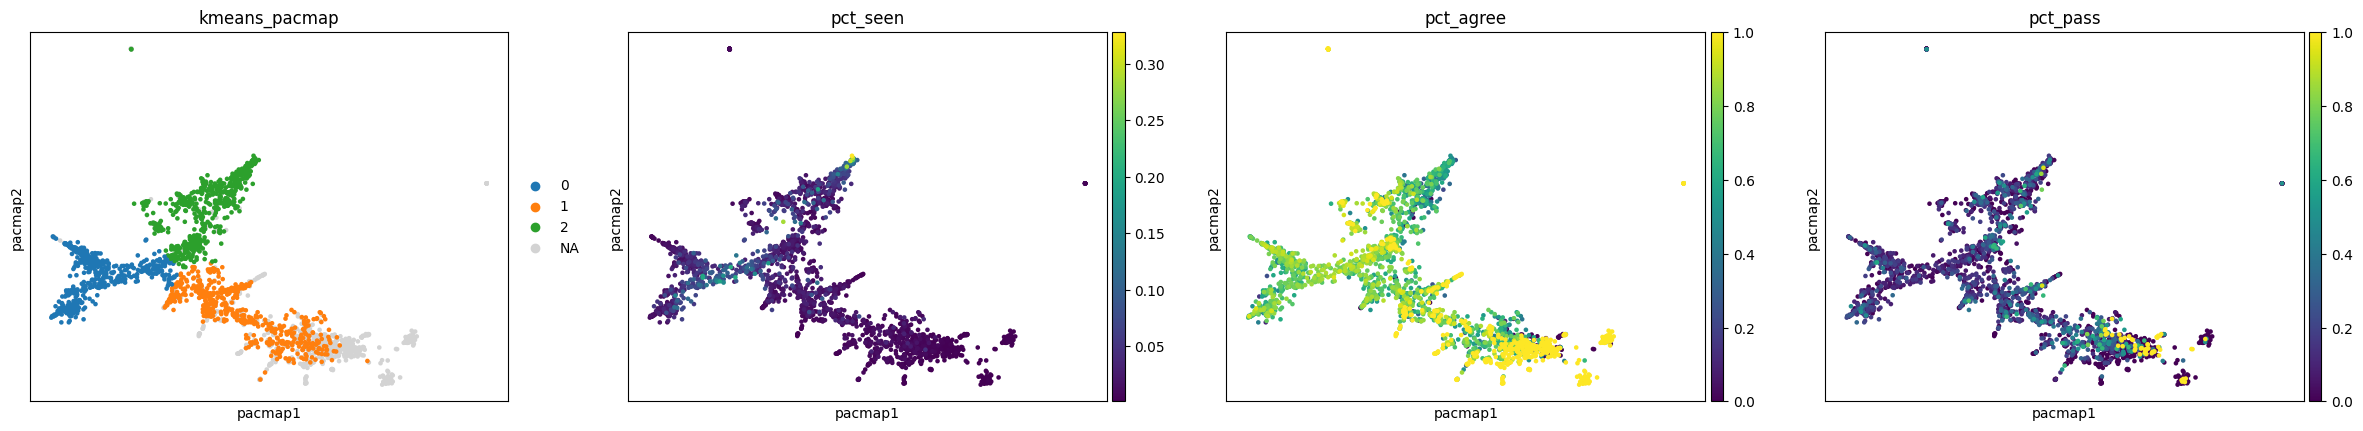

In [ ]:
val.viz.embedding(adata, basis="pacmap",
    color=["kmeans_pacmap", "pct_seen", "pct_agree", "pct_pass"],
)